In [1]:
from extras_lib import *

In [2]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [3]:
model_filename = 'sam_vit_h_4b8939.pth'

if not os.path.exists(model_filename):
    download('https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth', model_filename)

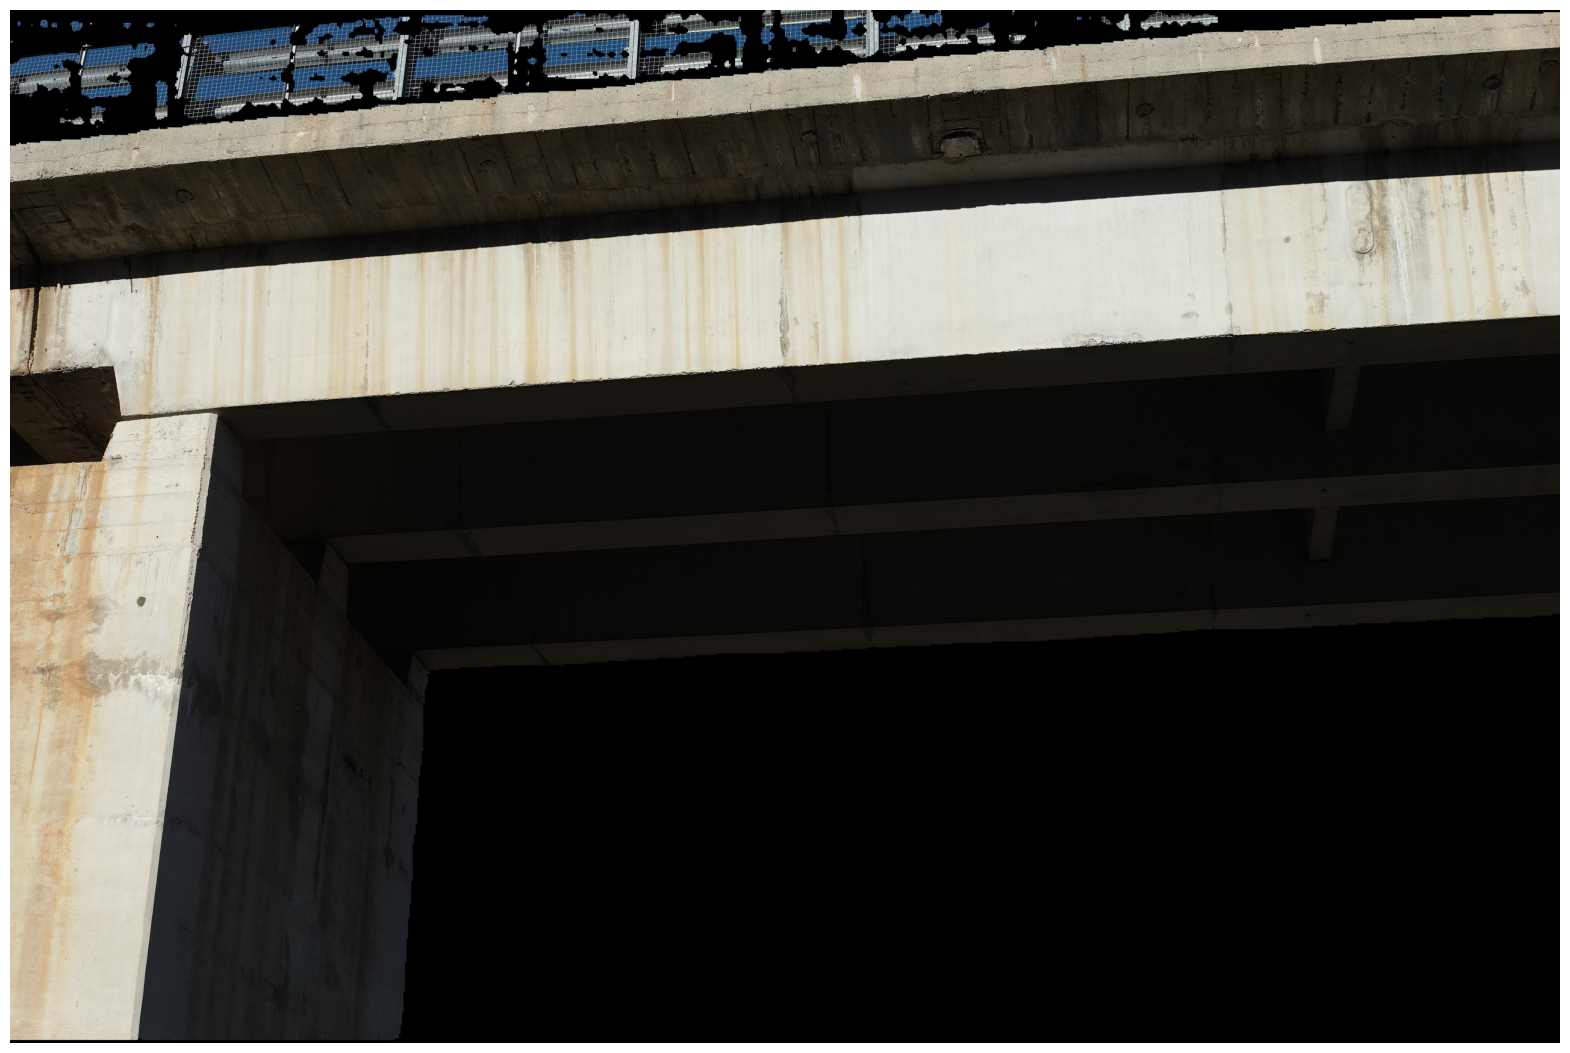

In [17]:
# getting a random sample:
adapted_rootpath = os.path.join('..',ROOT_OUTFOLDERPATH)
img_path = choice(get_all_images(adapted_rootpath))
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))

plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [21]:
sam = sam_model_registry["vit_h"](model_filename)
sam.to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(                                           
    model=sam,
    points_per_side=64,
    pred_iou_thresh=0.85,
    stability_score_thresh=0.85,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
    points_per_batch=32,
)

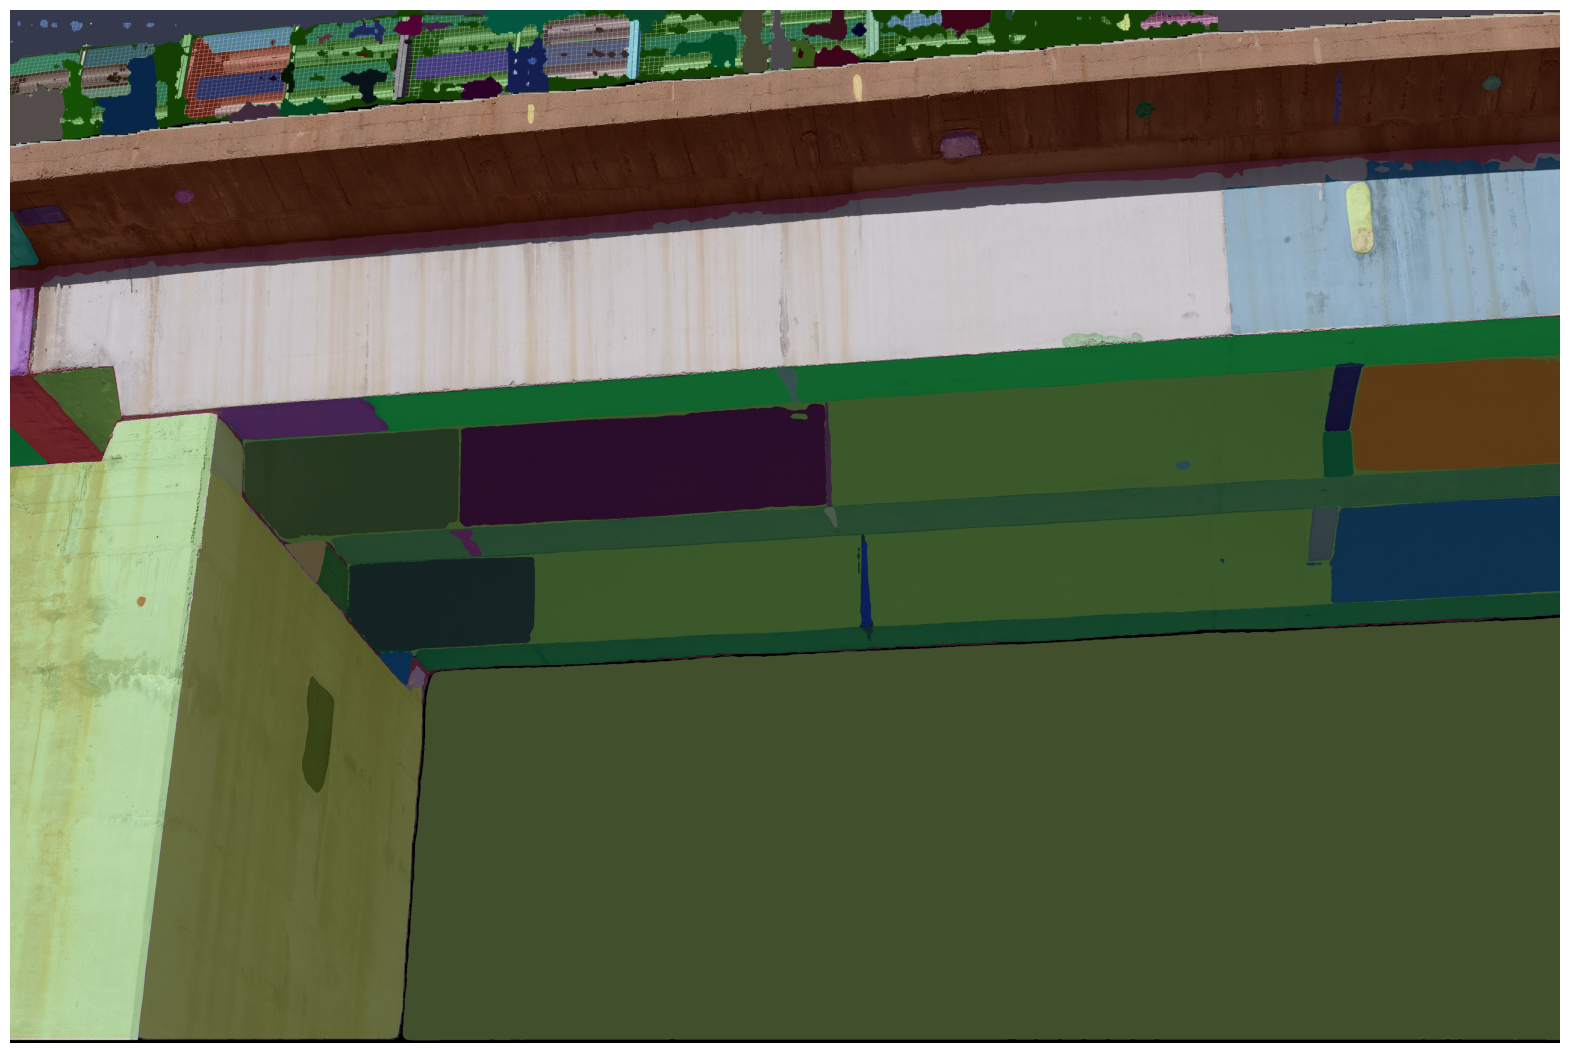

In [22]:
masks = mask_generator.generate(image)
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [19]:
torch.cuda.empty_cache()